### LOAD AND TRANSFORM DATASET

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
X_train = pd.read_csv("/Users/morrisonosiezagha/Downloads/archive/X_train.csv")
X_test = pd.read_csv("/Users/morrisonosiezagha/Downloads/archive/X_test.csv")
Y_train = pd.read_csv("/Users/morrisonosiezagha/Downloads/archive/Y_train.csv")
Y_test = pd.read_csv("/Users/morrisonosiezagha/Downloads/archive/Y_test.csv")

# Ensure target columns are labeled consistently
Y_train.columns = ["Loan_approval"]
Y_test.columns = ["Loan_approval"]

# Add the target column to the respective datasets
train_combined = pd.concat([X_train, Y_train], axis=1)
test_combined = pd.concat([X_test, Y_test], axis=1)

# Combine the train and test sets into one complete dataset
loan_df = pd.concat([train_combined, test_combined])

# Display the shape and first few rows of the complete dataset
print("Shape of complete dataset:", loan_df.shape)
print(loan_df.head())

Shape of complete dataset: (480, 13)
    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area Loan_approval  
0               1         Urban             Y  
1               1     Semiurban             Y  
2

### PREPROCESS AND PERFORM EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
loan_df.info() # displaying the variables and their dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 95
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    int64  
 9   Loan_Amount_Term   480 non-null    int64  
 10  Credit_History     480 non-null    int64  
 11  Property_Area      480 non-null    object 
 12  Loan_approval      480 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 52.5+ KB


In [5]:
loan_df.isna().sum() # checking for missing entries

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_approval        0
dtype: int64

<Axes: xlabel='Loan_approval', ylabel='Count'>

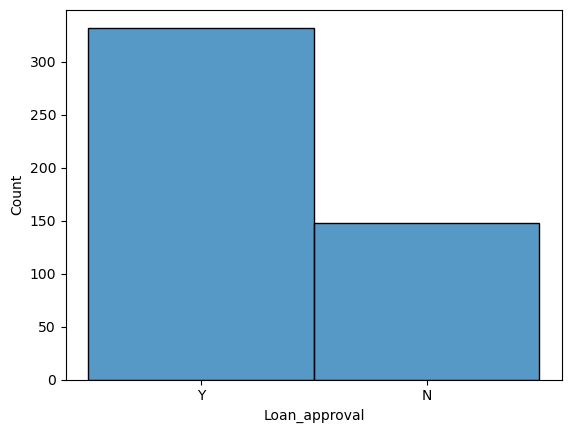

In [6]:
sns.histplot(loan_df["Loan_approval"]) # exploring the target variable

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

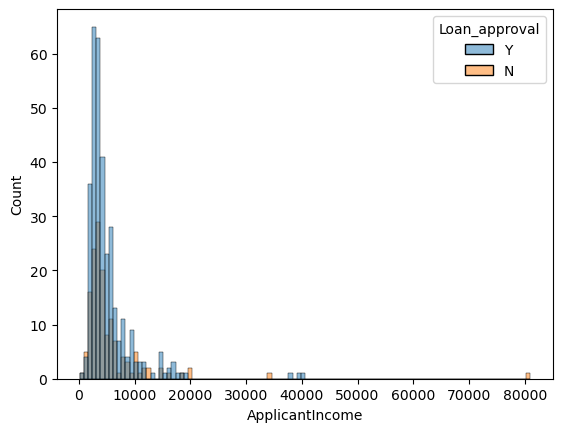

In [7]:
# exploring application income distribution against the loan approval
sns.histplot(x=loan_df["ApplicantIncome"], hue=loan_df["Loan_approval"])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

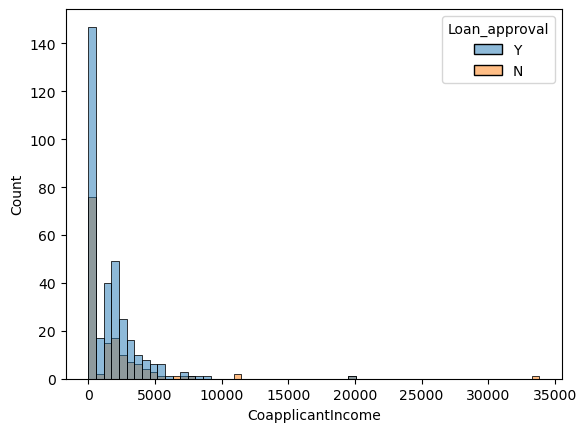

In [8]:
# exploring the coapplication income distribution against the loan application
sns.histplot(x=loan_df["CoapplicantIncome"], hue=loan_df["Loan_approval"])

<Axes: xlabel='LoanAmount', ylabel='Count'>

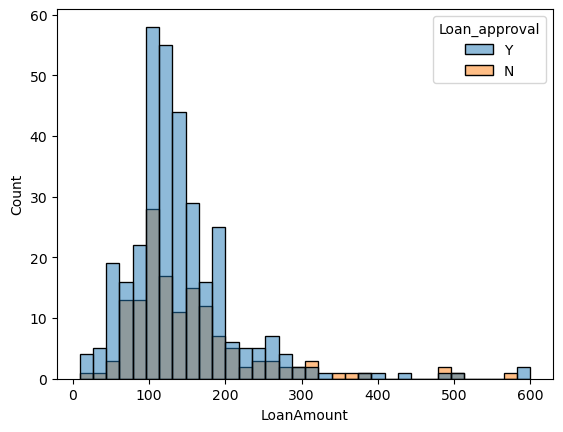

In [9]:
# exploring the loan amount distribution against the loan approval
sns.histplot(x=loan_df["LoanAmount"], hue=loan_df["Loan_approval"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

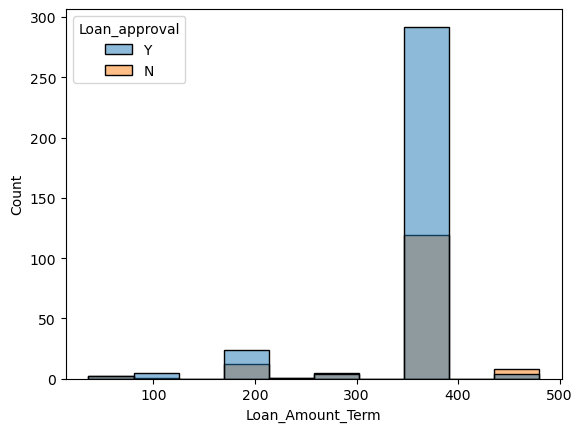

In [10]:
# exploring the loan amount term distribution against the loan approval
sns.histplot(x=loan_df["Loan_Amount_Term"], hue=loan_df["Loan_approval"])

<Axes: xlabel='Credit_History', ylabel='Count'>

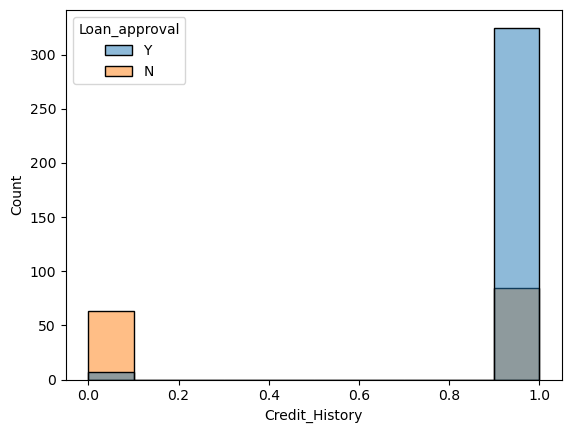

In [11]:
# exploring the credit history of applicants against the loan approval
sns.histplot(x=loan_df["Credit_History"], hue=loan_df["Loan_approval"])

<Axes: ylabel='ApplicantIncome'>

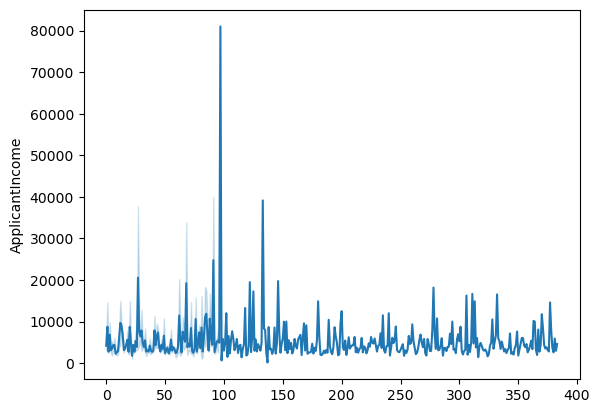

In [12]:
# exploring the applicant income distribution
sns.lineplot(loan_df["ApplicantIncome"])

<Axes: ylabel='CoapplicantIncome'>

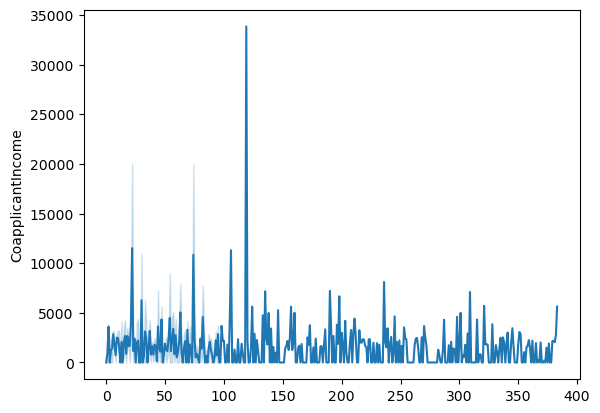

In [13]:
# exploring the coapplicantincome distribution
sns.lineplot(loan_df["CoapplicantIncome"])

<Axes: ylabel='LoanAmount'>

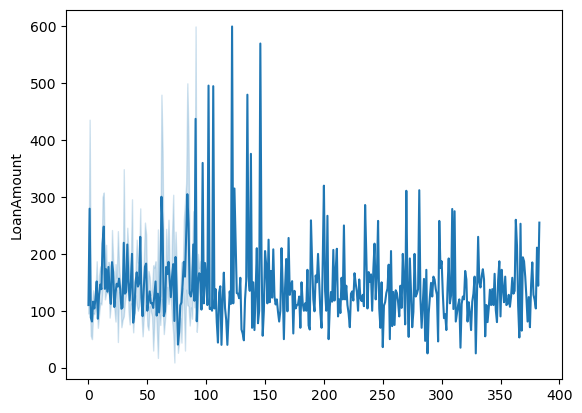

In [14]:
# exploring the loan amount distribution
sns.lineplot(loan_df["LoanAmount"])

<Axes: ylabel='Loan_Amount_Term'>

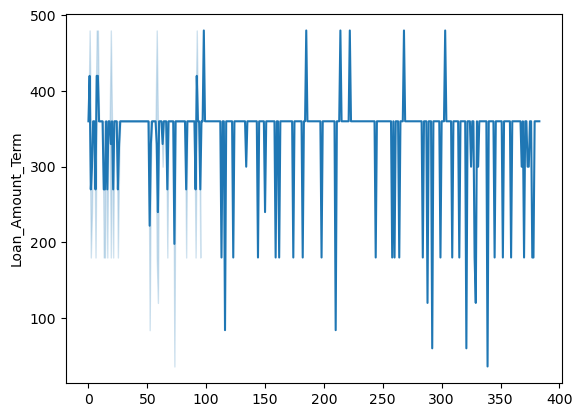

In [15]:
# exploring the loan amount term distribution
sns.lineplot(loan_df["Loan_Amount_Term"])

<Axes: ylabel='Credit_History'>

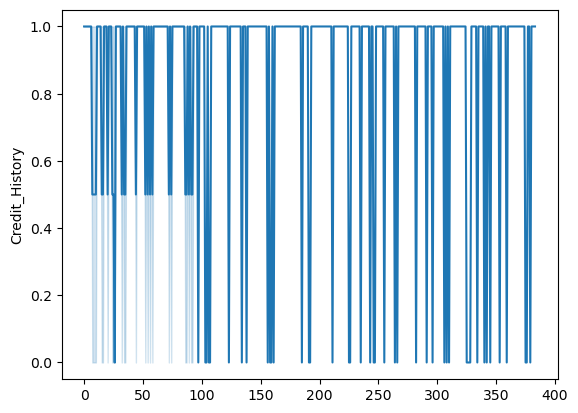

In [16]:
# exploring the credit history distribution
sns.lineplot(loan_df["Credit_History"])

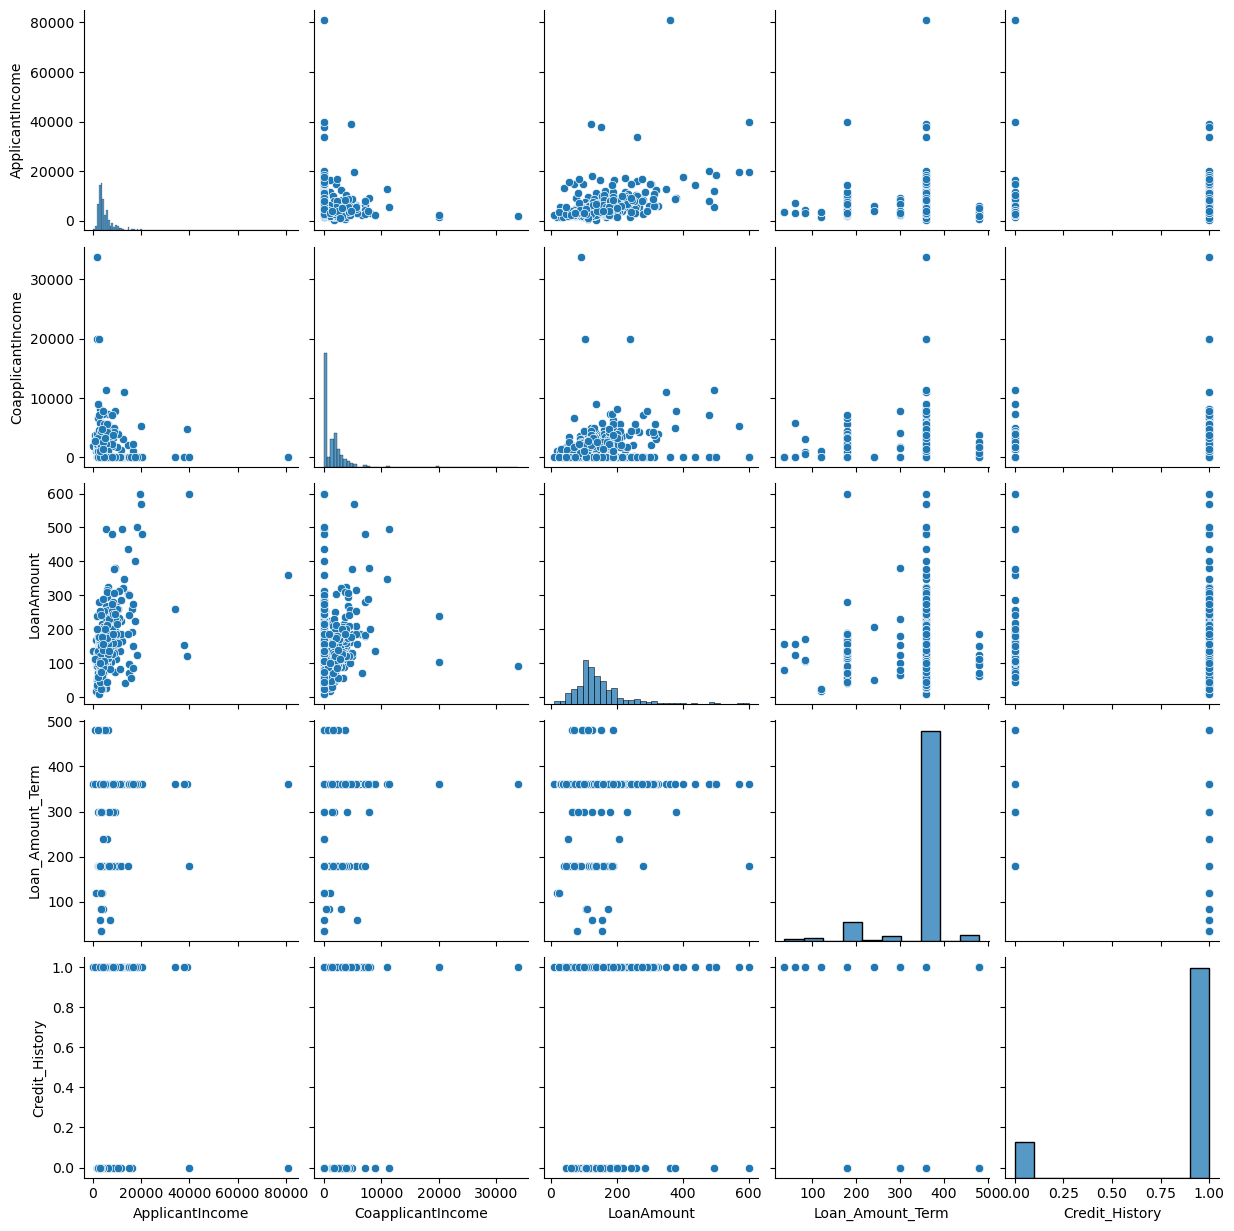

In [17]:
# further data exploration of the nemerical variables with pairplot
sns.pairplot(loan_df)

### FEATURE EGINEERING: DEFINE NEW RELEVANT FEATURES

In [19]:
# computing and defining new variables to optimize the loan approval prediction
loan_df["TotalIncome"] = loan_df["ApplicantIncome"] + loan_df["CoapplicantIncome"]
loan_df["Debt_to_Income"] = loan_df["LoanAmount"] / loan_df["TotalIncome"]

In [20]:
print(loan_df.head()) # confirming the new entries

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area Loan_approval  TotalIncome  Debt_to_Income  
0               1         Urban             Y       4950.0        0.025253  
1               1     Semiur

In [21]:
loan_df.info() # confirming the new entry's dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 95
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    int64  
 9   Loan_Amount_Term   480 non-null    int64  
 10  Credit_History     480 non-null    int64  
 11  Property_Area      480 non-null    object 
 12  Loan_approval      480 non-null    object 
 13  TotalIncome        480 non-null    float64
 14  Debt_to_Income     480 non-null    float64
dtypes: float64(3), int64(4), object(8)
memory usage: 60.0+ KB


### LABEL ENCODE CATEGORICAL COLUMNS

In [23]:
# import required library
from sklearn.preprocessing import LabelEncoder

# combine categorical columns and fill missing entries with mode if any
categorical_columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_approval']
loan_df[categorical_columns] = loan_df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    loan_df[col] = label_encoder.fit_transform(loan_df[col])

# confirm label encoded categorical columns
print(loan_df.head())

   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0       13       1        0           0          0              0   
1      193       1        1           1          0              0   
2      461       1        1           0          0              0   
3      191       1        1           2          0              0   
4      300       1        1           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History  Property_Area  Loan_approval  TotalIncome  Debt_to_Income  
0               1              2              1       4950.0        0.025253  


In [24]:
loan_df.info() # checking dtype of the new columns

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 95
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    int64  
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    int64  
 9   Loan_Amount_Term   480 non-null    int64  
 10  Credit_History     480 non-null    int64  
 11  Property_Area      480 non-null    int64  
 12  Loan_approval      480 non-null    int64  
 13  TotalIncome        480 non-null    float64
 14  Debt_to_Income     480 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 60.0 KB


### BUILD THE LOAN APPROVAL MODEL: TRAIN MODEL AND MAKE PREDICTION WITH UNSEEN TEST DATA

In [26]:
# import required libraries 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 

# define inpute and target variables
X = loan_df.drop("Loan_approval", axis=1)
y = loan_df["Loan_approval"]

# Split the dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, Y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Loan Approval Initial Prediction Model Accuracy: {accuracy:.2%}")


Loan Approval Initial Prediction Model Accuracy: 84.38%


### FURTHER EVALUATION OF THE MODEL

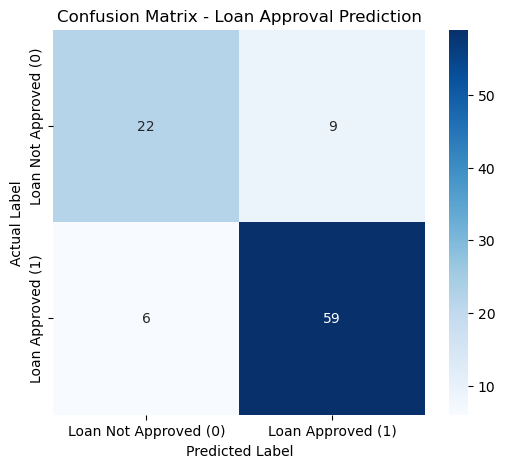


Classification Report:
                       precision    recall  f1-score   support

Loan Not Approved (0)       0.79      0.71      0.75        31
    Loan Approved (1)       0.87      0.91      0.89        65

             accuracy                           0.84        96
            macro avg       0.83      0.81      0.82        96
         weighted avg       0.84      0.84      0.84        96


ROC-AUC Score: 0.8337


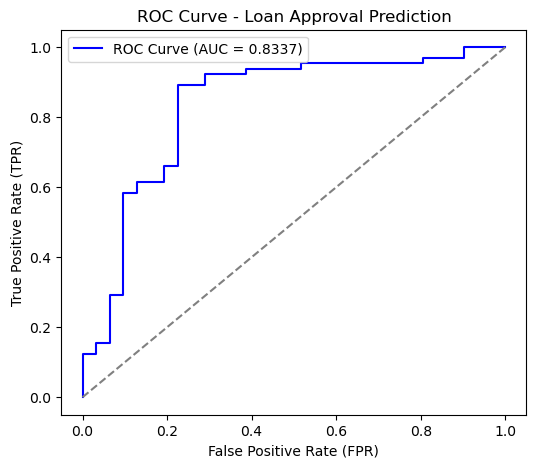

In [28]:
# import required libraries
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.calibration import calibration_curve

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Define labels
labels = ["Loan Not Approved (0)", "Loan Approved (1)"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Loan Approval Prediction")
plt.show()

# Compute and print classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=labels))

# Compute ROC-AUC Score
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(Y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Loan Approval Prediction")
plt.legend()
plt.show()


### CALIBRATION CURVE AND HEATMAP

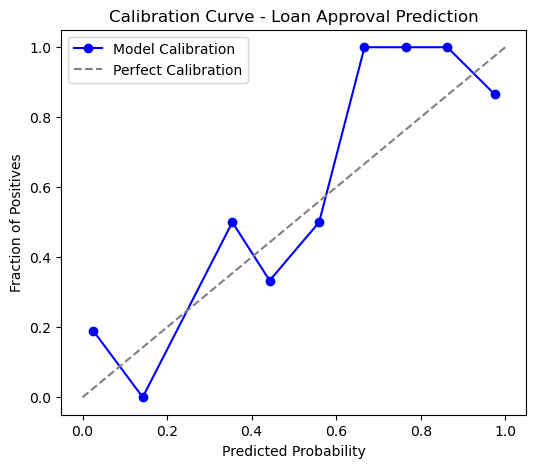

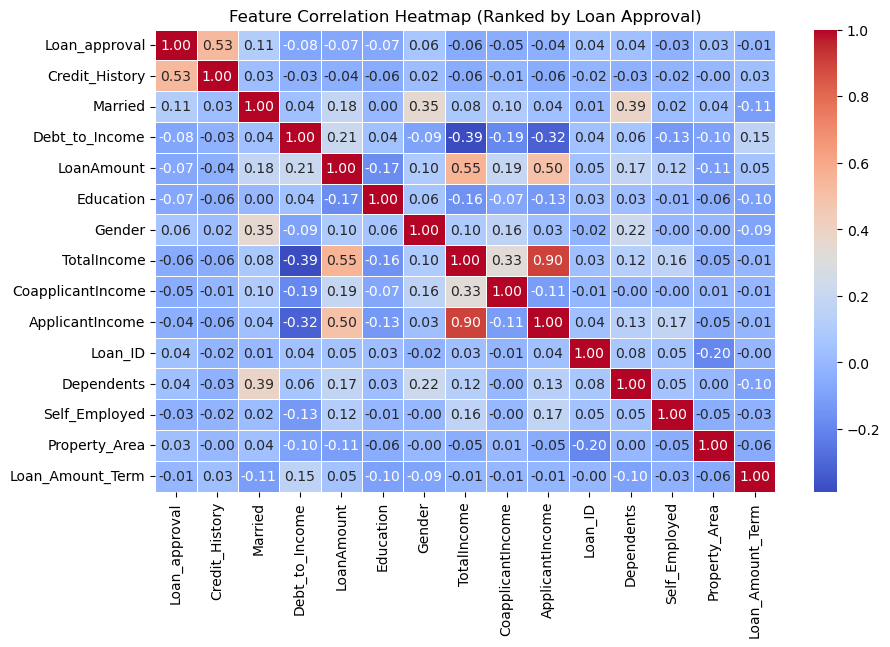

In [30]:
# Compute the calibration curve
prob_true, prob_pred = calibration_curve(Y_test, y_pred_proba, n_bins=10, strategy="uniform")

# Plot the calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred, prob_true, marker="o", color="blue", label="Model Calibration")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfect Calibration")  # Reference line

# Formatting
plt.xlabel("Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve - Loan Approval Prediction")
plt.legend()
plt.show()

# Compute correlation matrix
corr_matrix = loan_df.corr()

# Sort features by absolute correlation with Loan_approval
sorted_features = corr_matrix["Loan_approval"].abs().sort_values(ascending=False).index

# Plot heatmap with sorted features
plt.figure(figsize=(10, 6))
sns.heatmap(loan_df[sorted_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap (Ranked by Loan Approval)")
plt.show()


### ATTEMPT TO OPTIMIZE MODEL ACCURACY WITH SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Train XGBoost on balanced data
xgb_model.fit(X_train_resampled, Y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Trial Loan Approval Prediction Model Accuracy: {accuracy:.2%}")


Trial Loan Approval Prediction Model Accuracy: 79.17%


### ATTEMPT TO OPTIMIZE MODEL ACCURACY WITH GRIDSEARCHCV

In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Initialize model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

# Grid search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Trial Model Accuracy: {accuracy:.2%}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Trial Model Accuracy: 83.33%


### OPTIMIZED LOAN APPROVAL PREDICTION MODEL ACCURACY WITH L1 & L2 REGULARIZATION

In [36]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss", 
    max_depth=5, 
    learning_rate=0.1, 
    n_estimators=200, 
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.5, # L2 regularization
    random_state=42
)
# Train the model
xgb_model.fit(X_train, Y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Final Improved Loan Approval Prediction Model Accuracy: {accuracy:.2%}")


Final Improved Loan Approval Prediction Model Accuracy: 85.42%


### SUMMARY

- The loan dataset was sourced from Kaggle.
- It contains loan approval information for individuals based on features such as Income, Gender, Credit History, Education, etc.
- No missing entries were found in the dataset.
- Exploratory Data Analysis (EDA) was conducted, including visualizations to gain insights.
- New features were derived, such as: Debt-to-Income Ratio (Debt/Total Income), Total Income (Sum of Applicant & Co-applicant Income)
- Label Encoding was applied to categorical variables, converting them to numerical values (0s and 1s).
- The dataset was split into 80% training and 20% testing.
- An Extreme Gradient Boosting (XGB) Classifier was used to predict loan approval.
- Initial model accuracy: 84.38%, with Credit History being the most influential feature.
- L1 and L2 Regularization were applied to reduce overfitting and improve accuracy
- Accuracy improved from 84% to 85.42% suggesting a better model performance
- A person with: Good credit history, Married status, Lower debt-to-income ratio, Moderate loan amount, and Higher education level is more likely to get their loan approved quickly.
- Calibration Curve analysis suggests a higher probability of loan approval for eligible applicants.